In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import time
import functools
import cv2

In [3]:
Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]]

In [4]:
Z = np.array(Z)

In [5]:
N = np.zeros(Z.shape, dtype=int)
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

In [6]:
N

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 3, 1, 2, 0],
       [0, 1, 5, 3, 3, 0],
       [0, 2, 3, 2, 2, 0],
       [0, 1, 2, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [7]:
# Flatten arrays
N_ = N.ravel()
Z_ = Z.ravel()

# Apply rules
R1 = np.argwhere( (Z_==1) & (N_ < 2) )
R2 = np.argwhere( (Z_==1) & (N_ > 3) )
R3 = np.argwhere( (Z_==1) & ((N_==2) | (N_==3)) )
R4 = np.argwhere( (Z_==0) & (N_==3) )

# Set new values
Z_[R1] = 0
Z_[R2] = 0
Z_[R3] = Z_[R3]
Z_[R4] = 1

# Make sure borders stay null
Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0

In [8]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [9]:
N_

array([0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0, 0, 1, 5, 3, 3, 0, 0, 2, 3, 2,
       2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0])

In [10]:
birth = (N==3)[1:-1,1:-1] & (Z[1:-1,1:-1]==0)
survive = ((N==2) | (N==3))[1:-1,1:-1] & (Z[1:-1,1:-1]==1)
Z[...] = 0
Z[1:-1,1:-1][birth | survive] = 1

In [11]:
(N==3)[1:-1,1:-1]

array([[False,  True, False, False],
       [False, False,  True,  True],
       [False,  True, False, False],
       [False, False, False, False]])

In [12]:
(N==3)

array([[False, False, False, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False,  True,  True, False],
       [False, False,  True, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [13]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

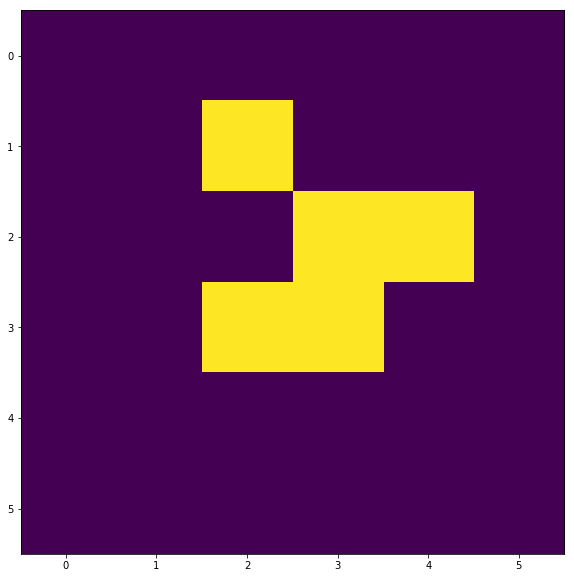

In [14]:
plt.imshow(Z)

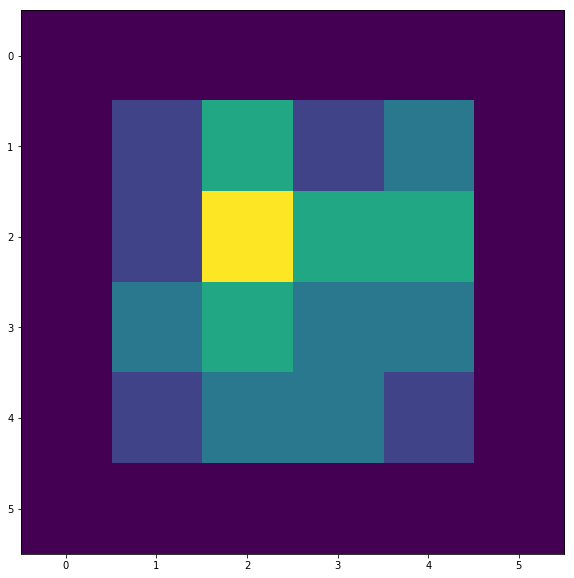

In [15]:
plt.imshow(N)

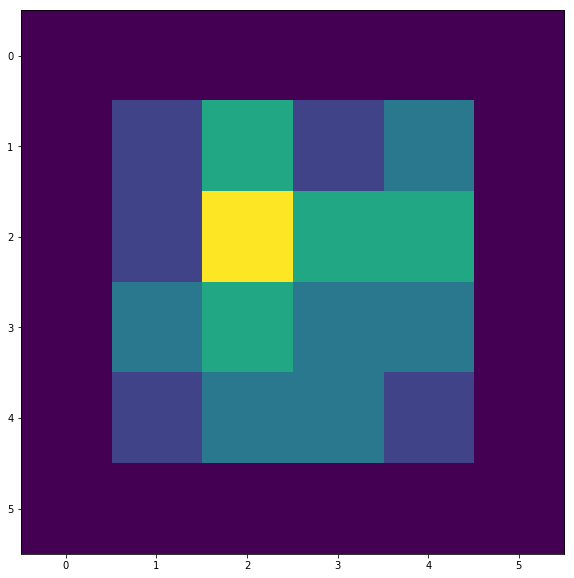

In [16]:
plt.imshow(N^600)

In [17]:
N*200

array([[   0,    0,    0,    0,    0,    0],
       [   0,  200,  600,  200,  400,    0],
       [   0,  200, 1000,  600,  600,    0],
       [   0,  400,  600,  400,  400,    0],
       [   0,  200,  400,  400,  200,    0],
       [   0,    0,    0,    0,    0,    0]])